In [29]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns


In [4]:
salary_train = pd.read_csv(r'C:/Users/DELL/Downloads/SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
salary_test = pd.read_csv(r'C:/Users/DELL/Downloads/SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### EDA

In [18]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [19]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [20]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [33]:
salary_test.corr(numeric_only= True)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'index'),
  Text(1.5, 0, 'age'),
  Text(2.5, 0, 'educationno'),
  Text(3.5, 0, 'capitalgain'),
  Text(4.5, 0, 'capitalloss'),
  Text(5.5, 0, 'hoursperweek')])

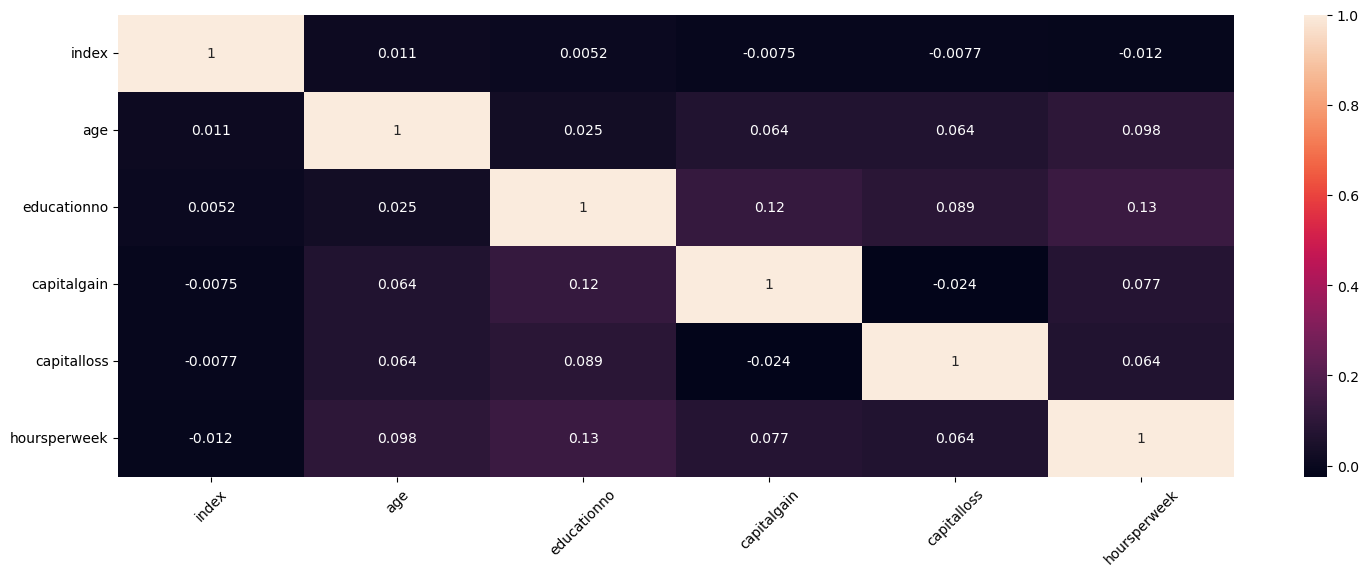

In [34]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(numeric_only= True), annot=True);
plt.xticks(rotation=45)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


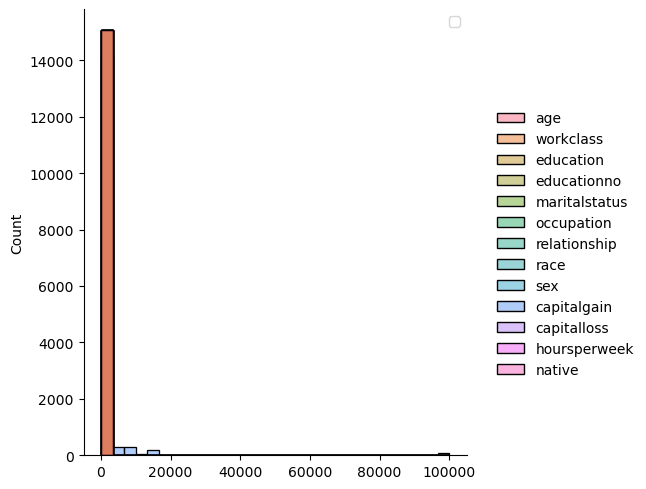

In [40]:
    sns.displot(salary_test, kde= False,bins=30)
    plt.legend(loc='best')
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


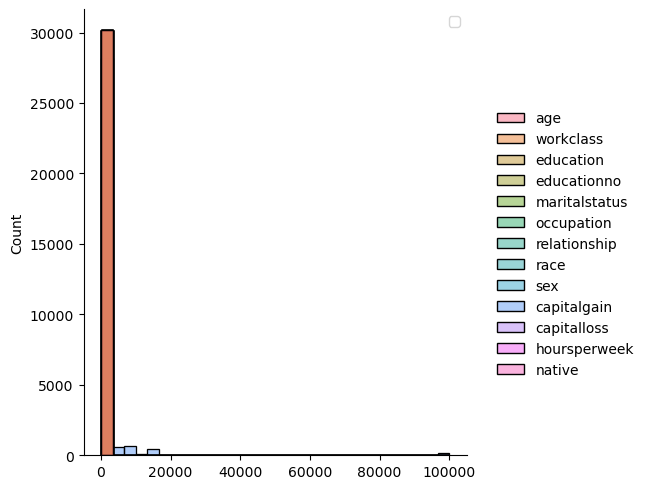

In [42]:
 sns.displot(salary_train, kde= False,bins=30)
 plt.legend(loc='best')
 plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary_train['workclass']=le.fit_transform(salary_train['workclass'])
salary_train['education']=le.fit_transform(salary_train['education'])
salary_train['maritalstatus']=le.fit_transform(salary_train['maritalstatus'])
salary_train['occupation']=le.fit_transform(salary_train['occupation'])
salary_train['relationship']=le.fit_transform(salary_train['relationship'])
salary_train['race']=le.fit_transform(salary_train['race'])
salary_train['sex']=le.fit_transform(salary_train['sex'])
salary_train['native']=le.fit_transform(salary_train['native'])

In [22]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary_test['workclass']=le.fit_transform(salary_test['workclass'])
salary_test['education']=le.fit_transform(salary_test['education'])
salary_test['maritalstatus']=le.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']=le.fit_transform(salary_test['occupation'])
salary_test['relationship']=le.fit_transform(salary_test['relationship'])
salary_test['race']=le.fit_transform(salary_test['race'])
salary_test['sex']=le.fit_transform(salary_test['sex'])
salary_test['native']=le.fit_transform(salary_test['native'])

In [24]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [25]:
salary_trainx=salary_train.iloc[:,0:13]
salary_trainy=salary_train.iloc[:,-1]
salary_testx=salary_test.iloc[:,0:13]
salary_testy=salary_test.iloc[:,-1]

### Model Training

In [43]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

classifier_gb=GaussianNB()
classifier_gb.fit(salary_trainx,salary_trainy)

GaussianNB()

#### Model Predictions

In [44]:
y_pred=classifier_gb.predict(salary_testx)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

### Print Accuracy Score, Confusion Matrix and Classification Report

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(salary_testy,y_pred))

0.7946879150066402


In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(salary_testy, y_pred)
print(cm)

[[10759   601]
 [ 2491  1209]]


In [47]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(salary_testy,y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060

